<a href="https://colab.research.google.com/github/Krshnna/Machine-Learning-Algorithms/blob/main/logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Since this logistic regression is binary classification algorithm, and this dataset contains three classes, so we have to drop one of the classes.

## here i am dropping virginica

In [6]:
df = df[df['species'] != 'virginica']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [8]:
df['species'].value_counts()

setosa        50
versicolor    50
Name: species, dtype: int64

<Axes: xlabel='sepal_length', ylabel='Count'>

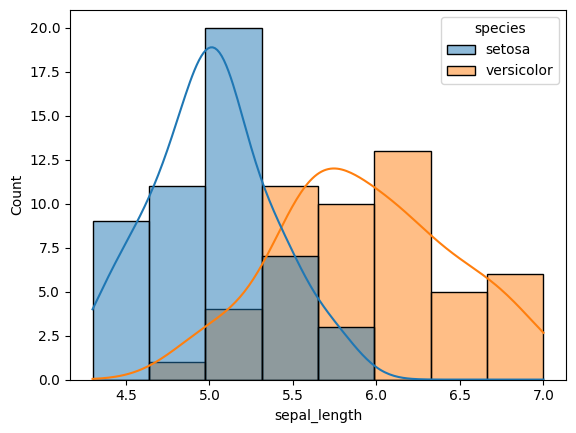

In [14]:
sns.histplot(x = 'sepal_length', hue = 'species', data = df, kde = True)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

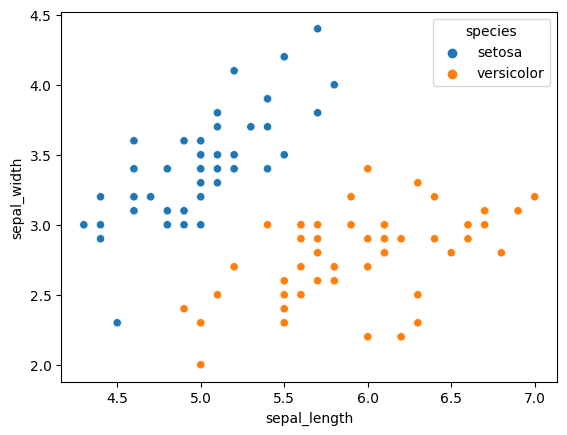

In [13]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = df)

1. we can see setosa has smaller length but larger width.
2. versicolor has larger length but smaller width.

<Axes: xlabel='petal_length', ylabel='petal_width'>

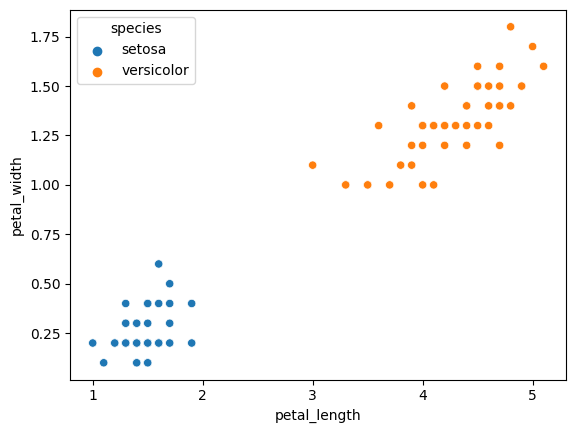

In [16]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = df)

1. setosa has smaller petal length and smaller petal_width
2. versicolor has larger length and larger width

pairplot


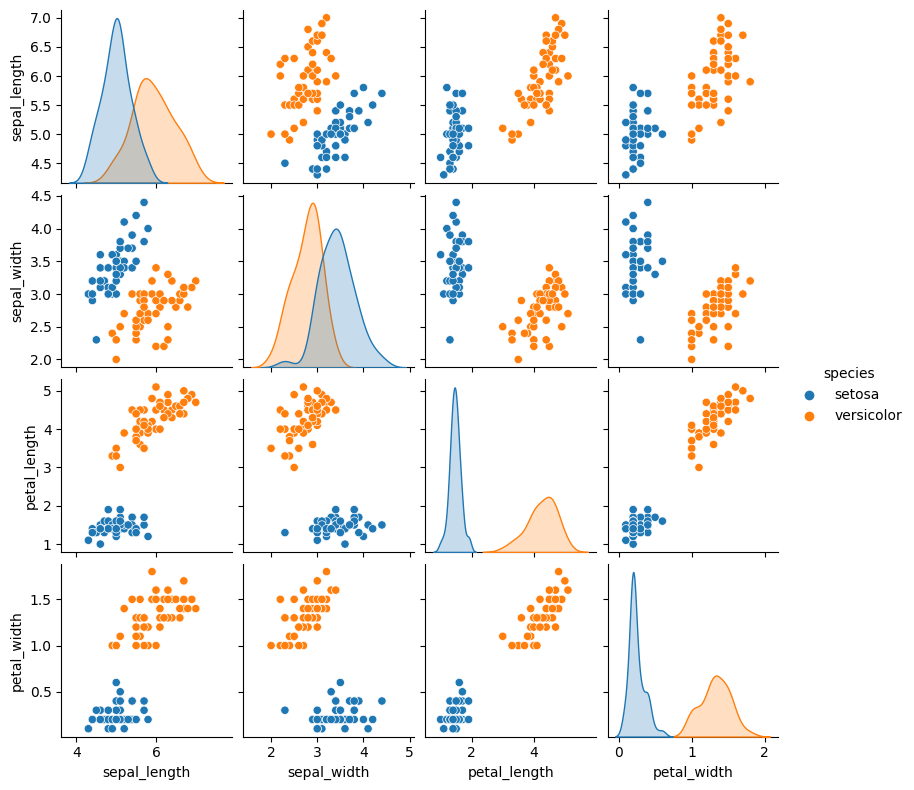

In [18]:
sns.pairplot(hue = 'species', height = 2, data = df)

there are lot many ways to to analysis the data but my main focus is rn on logistic regression

### train test split

In [27]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,: -1]
y = df.iloc[:,-1]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

In [37]:
lr.fit(x_train, y_train)
predict = lr.predict(x_test)
score = accuracy_score(y_test, predict)
print(score)

1.0


creating a confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predict)
print(matrix)

array([[13,  0],
       [ 0, 12]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



Hence our model predicted all the values correctly